# 영상입력 수치 예측 모델(다층퍼셉트론 신경망 모델)

- 영상 데이터를 생성하여 고정된 지역에서 촬영된 영상으로부터 복잡도, 밀도 등을 수치화하는 문제 해결  

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### 1. 데이터 셋 준비 
* 너비가 16, 높이가 16이고, 픽셀값을 0과 1을 가지는 영상 생성 
* 임의의 값이 주어지면, 그 값만큼 반복하여 영상 내에 1인 픽셀을 생성
* 임의의 값이 라벨값으로 지정했습니다.

In [2]:
width = 16
height = 16

# 이미지를 생성하는 함수 
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

# 데이터 셋을 생성하는 함수 
def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)

### 2. 데이터셋 생성 
- 훈련셋을 1500개, 검증셋을 300개, 시험셋을 100개 생성

In [3]:
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

* Dense 레이어는 일차원 벡터로 데이터를 입력 받기 때문에 2차원인 영상을 일차원 벡터로 변환함.

In [4]:
x_train_1d = x_train.reshape(x_train.shape[0], width*height)
x_val_1d = x_val.reshape(x_val.shape[0], width*height)
x_test_1d = x_test.reshape(x_test.shape[0], width*height)

### 3. 모델 준비 

In [5]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim = width*height))
model.add(Dense(256, activation='relu'))
model.add(Dense(256))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 197,633
Trainable params: 197,633
Non-trainable params: 0
_________________________________________________________________


### 4. 모델 학습과정 설정하기

In [6]:
model.compile(loss='mse', optimizer='adam')

### 5.모델 학습시키기

In [7]:
hist = model.fit(x_train_1d, y_train, batch_size=32, epochs=1000, validation_data=(x_val_1d, y_val))

Epoch 1/1000
47/47 [==============================] - 0s 3ms/step - loss: 4569.1436 - val_loss: 322.9980
Epoch 2/1000
47/47 [==============================] - 0s 2ms/step - loss: 241.1489 - val_loss: 244.2345
Epoch 3/1000
47/47 [==============================] - 0s 1ms/step - loss: 201.0994 - val_loss: 215.6490
Epoch 4/1000
47/47 [==============================] - 0s 1ms/step - loss: 150.7212 - val_loss: 161.0776
Epoch 5/1000
47/47 [==============================] - 0s 1ms/step - loss: 111.4782 - val_loss: 138.0927
Epoch 6/1000
47/47 [==============================] - 0s 1ms/step - loss: 79.3463 - val_loss: 114.7922
Epoch 7/1000
47/47 [==============================] - 0s 2ms/step - loss: 57.9181 - val_loss: 112.3947
Epoch 8/1000
47/47 [==============================] - 0s 2ms/step - loss: 45.1524 - val_loss: 104.0559
Epoch 9/1000
47/47 [==============================] - 0s 1ms/step - loss: 35.8564 - val_loss: 99.0849
Epoch 10/1000
47/47 [==============================] - 0s 1ms/step -

47/47 [==============================] - 0s 2ms/step - loss: 1.8274 - val_loss: 90.3051
Epoch 82/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.3250 - val_loss: 89.7647
Epoch 83/1000
47/47 [==============================] - 0s 1ms/step - loss: 3.2141 - val_loss: 104.7452
Epoch 84/1000
47/47 [==============================] - 0s 1ms/step - loss: 9.3869 - val_loss: 91.6590
Epoch 85/1000
47/47 [==============================] - 0s 2ms/step - loss: 9.9624 - val_loss: 100.7035
Epoch 86/1000
47/47 [==============================] - 0s 1ms/step - loss: 8.8815 - val_loss: 102.5213
Epoch 87/1000
47/47 [==============================] - 0s 1ms/step - loss: 5.1684 - val_loss: 92.1215
Epoch 88/1000
47/47 [==============================] - 0s 1ms/step - loss: 3.4027 - val_loss: 92.5967
Epoch 89/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.8300 - val_loss: 91.1922
Epoch 90/1000
47/47 [==============================] - 0s 2ms/step - loss: 1.3223 - val_loss:

Epoch 161/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0698 - val_loss: 88.5796
Epoch 162/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0621 - val_loss: 88.7770
Epoch 163/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0843 - val_loss: 88.8082
Epoch 164/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0597 - val_loss: 88.5545
Epoch 165/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.0464 - val_loss: 88.5380
Epoch 166/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0789 - val_loss: 88.3984
Epoch 167/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.1102 - val_loss: 88.7625
Epoch 168/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3678 - val_loss: 87.8491
Epoch 169/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6490 - val_loss: 90.4006
Epoch 170/1000
47/47 [==============================] - 0s 1ms/step - los

47/47 [==============================] - 0s 2ms/step - loss: 21.2267 - val_loss: 130.1413
Epoch 241/1000
47/47 [==============================] - 0s 2ms/step - loss: 17.4866 - val_loss: 89.1367
Epoch 242/1000
47/47 [==============================] - 0s 1ms/step - loss: 5.3279 - val_loss: 88.9625
Epoch 243/1000
47/47 [==============================] - 0s 2ms/step - loss: 2.9529 - val_loss: 88.7878
Epoch 244/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.5595 - val_loss: 90.3287
Epoch 245/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.7883 - val_loss: 89.0416
Epoch 246/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.5946 - val_loss: 89.5510
Epoch 247/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3544 - val_loss: 87.9833
Epoch 248/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.2212 - val_loss: 88.1912
Epoch 249/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2294 - 

47/47 [==============================] - 0s 1ms/step - loss: 1.9567 - val_loss: 88.6537
Epoch 320/1000
47/47 [==============================] - 0s 1ms/step - loss: 2.2896 - val_loss: 91.0750
Epoch 321/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.7004 - val_loss: 89.8186
Epoch 322/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.8201 - val_loss: 88.8504
Epoch 323/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4210 - val_loss: 88.0359
Epoch 324/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.4132 - val_loss: 87.5600
Epoch 325/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2586 - val_loss: 87.7306
Epoch 326/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3295 - val_loss: 87.8417
Epoch 327/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2728 - val_loss: 89.2312
Epoch 328/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6136 - val

47/47 [==============================] - 0s 1ms/step - loss: 0.2529 - val_loss: 88.5725
Epoch 399/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2269 - val_loss: 87.6435
Epoch 400/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.2885 - val_loss: 87.6019
Epoch 401/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3644 - val_loss: 88.2048
Epoch 402/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3376 - val_loss: 88.6596
Epoch 403/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2619 - val_loss: 88.6243
Epoch 404/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.6290 - val_loss: 87.9683
Epoch 405/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.7189 - val_loss: 87.6789
Epoch 406/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.4619 - val_loss: 89.1314
Epoch 407/1000
47/47 [==============================] - 0s 1ms/step - loss: 3.1836 - val

47/47 [==============================] - 0s 1ms/step - loss: 0.7752 - val_loss: 86.8819
Epoch 478/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.5528 - val_loss: 88.0291
Epoch 479/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.4230 - val_loss: 88.6431
Epoch 480/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2711 - val_loss: 88.5343
Epoch 481/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3092 - val_loss: 88.5789
Epoch 482/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3747 - val_loss: 88.4512
Epoch 483/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3141 - val_loss: 88.8629
Epoch 484/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4573 - val_loss: 88.5344
Epoch 485/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3473 - val_loss: 88.0720
Epoch 486/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6553 - val

47/47 [==============================] - 0s 2ms/step - loss: 1.1657 - val_loss: 89.4537
Epoch 557/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.9654 - val_loss: 88.6998
Epoch 558/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.9695 - val_loss: 91.1041
Epoch 559/1000
47/47 [==============================] - 0s 2ms/step - loss: 1.7899 - val_loss: 90.5559
Epoch 560/1000
47/47 [==============================] - 0s 2ms/step - loss: 1.6640 - val_loss: 87.7988
Epoch 561/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.0633 - val_loss: 87.1930
Epoch 562/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.5100 - val_loss: 85.5537
Epoch 563/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.2020 - val_loss: 89.1932
Epoch 564/1000
47/47 [==============================] - 0s 2ms/step - loss: 1.7799 - val_loss: 102.2630
Epoch 565/1000
47/47 [==============================] - 0s 1ms/step - loss: 4.1084 - va

47/47 [==============================] - 0s 1ms/step - loss: 0.1123 - val_loss: 87.9030
Epoch 636/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0681 - val_loss: 87.2923
Epoch 637/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0602 - val_loss: 87.3815
Epoch 638/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0467 - val_loss: 87.1653
Epoch 639/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0456 - val_loss: 87.1303
Epoch 640/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 87.4517
Epoch 641/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0264 - val_loss: 87.7191
Epoch 642/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.0320 - val_loss: 87.1845
Epoch 643/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.0284 - val_loss: 87.1708
Epoch 644/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.0364 - val

47/47 [==============================] - 0s 1ms/step - loss: 0.6447 - val_loss: 86.9067
Epoch 715/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4914 - val_loss: 88.8442
Epoch 716/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.4447 - val_loss: 86.0031
Epoch 717/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2674 - val_loss: 87.0968
Epoch 718/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.2530 - val_loss: 88.0359
Epoch 719/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3717 - val_loss: 86.9384
Epoch 720/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2856 - val_loss: 87.2701
Epoch 721/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.6984 - val_loss: 89.5706
Epoch 722/1000
47/47 [==============================] - 0s 1ms/step - loss: 3.1112 - val_loss: 90.1818
Epoch 723/1000
47/47 [==============================] - 0s 2ms/step - loss: 2.9463 - val

47/47 [==============================] - 0s 2ms/step - loss: 1.4901 - val_loss: 87.9746
Epoch 794/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.3336 - val_loss: 88.7701
Epoch 795/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.8260 - val_loss: 87.1211
Epoch 796/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4982 - val_loss: 88.2403
Epoch 797/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.4165 - val_loss: 89.6720
Epoch 798/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.7220 - val_loss: 88.3362
Epoch 799/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3753 - val_loss: 86.6630
Epoch 800/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2006 - val_loss: 87.2722
Epoch 801/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.1592 - val_loss: 86.7410
Epoch 802/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.6173 - val

47/47 [==============================] - 0s 1ms/step - loss: 0.3977 - val_loss: 87.0455
Epoch 873/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2881 - val_loss: 87.2237
Epoch 874/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.2900 - val_loss: 87.8162
Epoch 875/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2799 - val_loss: 86.5671
Epoch 876/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.6039 - val_loss: 86.1364
Epoch 877/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.7245 - val_loss: 86.1921
Epoch 878/1000
47/47 [==============================] - 0s 2ms/step - loss: 1.4614 - val_loss: 89.0352
Epoch 879/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.8256 - val_loss: 87.9901
Epoch 880/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.7561 - val_loss: 86.0990
Epoch 881/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3809 - val

47/47 [==============================] - 0s 2ms/step - loss: 0.9468 - val_loss: 86.9398
Epoch 952/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.4264 - val_loss: 87.2537
Epoch 953/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.2987 - val_loss: 86.8457
Epoch 954/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.3456 - val_loss: 86.7039
Epoch 955/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.6949 - val_loss: 87.2390
Epoch 956/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.1522 - val_loss: 88.9840
Epoch 957/1000
47/47 [==============================] - 0s 1ms/step - loss: 1.7288 - val_loss: 90.1249
Epoch 958/1000
47/47 [==============================] - 0s 2ms/step - loss: 0.8327 - val_loss: 85.7151
Epoch 959/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.7653 - val_loss: 86.0432
Epoch 960/1000
47/47 [==============================] - 0s 1ms/step - loss: 0.3955 - val

### 6. 학습과정 살펴보기

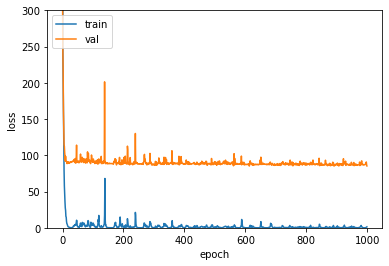

In [8]:
%matplotlib inline

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### 7. 모델 평가하기

In [9]:
score = model.evaluate(x_test_1d, y_test, batch_size=32)
print(score)

4/4 [==============================] - 0s 755us/step - loss: 83.2338
83.2337875366211


### 8. 모델 사용하기

In [10]:
yhat_test = model.predict(x_test_1d, batch_size=32)
#print(yhat_test)

### 시각화

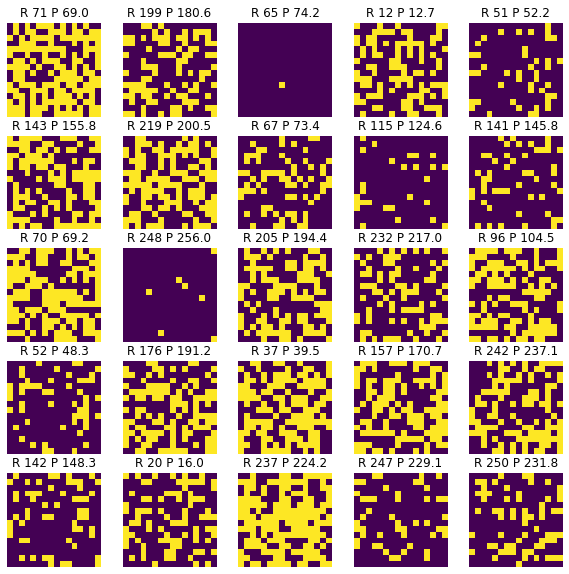

In [11]:
%matplotlib inline
        
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_train[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))
plt.show()